
### Examining racial discrimination in the US job market

#### Background
Racial discrimination continues to be pervasive in cultures throughout the world. Researchers examined the level of racial discrimination in the United States labor market by randomly assigning identical résumés black-sounding or white-sounding names and observing the impact on requests for interviews from employers.

#### Data
In the dataset provided, each row represents a resume. The 'race' column has two values, 'b' and 'w', indicating black-sounding and white-sounding. The column 'call' has two values, 1 and 0, indicating whether the resume received a call from employers or not.

Note that the 'b' and 'w' values in race are assigned randomly to the resumes.

#### Exercise
You will perform a statistical analysis to establish whether race has a significant impact on the rate of callbacks for resumes.

Answer the following questions **in this notebook below and submit to your Github account**. 

   1. What test is appropriate for this problem? Does CLT apply?
   2. What are the null and alternate hypotheses?
   3. Compute margin of error, confidence interval, and p-value.
   4. Discuss statistical significance.

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet


#### Resources
+ Experiment information and data source: http://www.povertyactionlab.org/evaluation/discrimination-job-market-united-states
+ Scipy statistical methods: http://docs.scipy.org/doc/scipy/reference/stats.html 
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****

In [1]:
import pandas as pd
import numpy as np
from scipy import stats

In [2]:
data = pd.io.stata.read_stata('data/us_job_market_discrimination.dta')

In [3]:
# number of callbacks for balck-sounding names
sum(data[data.race=='b'].call)

157.0

In [4]:
data.head()

,id,ad,education,ofjobs,yearsexp,honors,volunteer,military,empholes,occupspecific,...,compreq,orgreq,manuf,transcom,bankreal,trade,busservice,othservice,missind,ownership
0,b,1,4,2,6,0,0,0,1,17,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
1,b,1,3,3,6,0,1,1,0,316,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
2,b,1,4,1,6,0,0,0,0,19,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
3,b,1,3,4,6,0,1,0,1,313,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,
4,b,1,3,3,22,0,0,0,0,313,...,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,Nonprofit


In [5]:
len(data)

4870

In [6]:
list(data.columns)

['id',
 'ad',
 'education',
 'ofjobs',
 'yearsexp',
 'honors',
 'volunteer',
 'military',
 'empholes',
 'occupspecific',
 'occupbroad',
 'workinschool',
 'email',
 'computerskills',
 'specialskills',
 'firstname',
 'sex',
 'race',
 'h',
 'l',
 'call',
 'city',
 'kind',
 'adid',
 'fracblack',
 'fracwhite',
 'lmedhhinc',
 'fracdropout',
 'fraccolp',
 'linc',
 'col',
 'expminreq',
 'schoolreq',
 'eoe',
 'parent_sales',
 'parent_emp',
 'branch_sales',
 'branch_emp',
 'fed',
 'fracblack_empzip',
 'fracwhite_empzip',
 'lmedhhinc_empzip',
 'fracdropout_empzip',
 'fraccolp_empzip',
 'linc_empzip',
 'manager',
 'supervisor',
 'secretary',
 'offsupport',
 'salesrep',
 'retailsales',
 'req',
 'expreq',
 'comreq',
 'educreq',
 'compreq',
 'orgreq',
 'manuf',
 'transcom',
 'bankreal',
 'trade',
 'busservice',
 'othservice',
 'missind',
 'ownership']

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_palette("deep", desat=.6)
sns.set_context(rc={"figure.figsize": (8,4)})

In [8]:
ed = data.groupby(['race','education']).size()

In [9]:
ed

race  education
b     0              28
      1              22
      2             132
      3             493
      4            1760
w     0              18
      1              18
      2             142
      3             513
      4            1744
dtype: int64

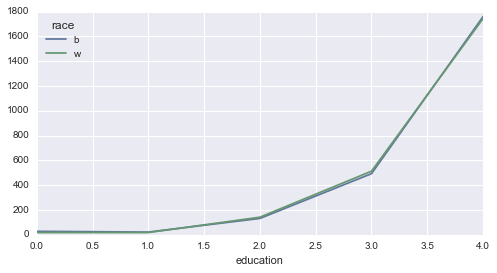

In [10]:
ed.unstack('race').plot()

In [11]:
exp = data.groupby(['race','yearsexp']).size()

In [12]:
exp

race  yearsexp
b     1            19
      2           177
      3            95
      4           259
      5           264
      6           409
      7           274
      8           288
      9            78
      10           72
      11           86
      12           33
      13           80
      14           78
      15           21
      16           43
      17            2
      18           36
      19           24
      20           11
      21           21
      22            4
      23            4
      25            3
      26           53
      44            1
w     1            26
      2           175
      3            99
      4           278
      5           243
      6           408
      7           267
      8           290
      9            81
      10           58
      11           87
      12           36
      13           74
      14           71
      15           13
      16           51
      17            1
      18           41
      19         

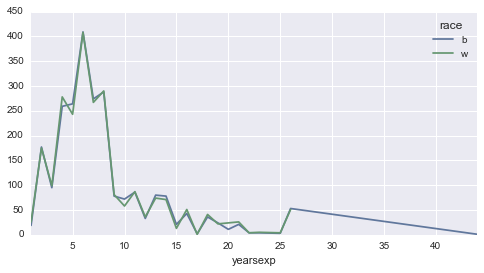

In [13]:
exp.unstack('race').plot()

### Want to generate all graphs in loop statments

In [35]:
plotdata = data[['education', 'yearsexp','sex','race']]

In [80]:
plotdata.head()

,education,yearsexp,sex,race
0,4,6,f,w
1,3,6,f,w
2,4,6,f,b
3,3,6,f,b
4,3,22,f,w


In [94]:
def groupings(df):
    return df.groupby(['race', colname]).size()
for colname, col in plotdata.iteritems():
    print(groupings(plotdata))

race  education
b     0              28
      1              22
      2             132
      3             493
      4            1760
w     0              18
      1              18
      2             142
      3             513
      4            1744
dtype: int64
race  yearsexp
b     1            19
      2           177
      3            95
      4           259
      5           264
      6           409
      7           274
      8           288
      9            78
      10           72
      11           86
      12           33
      13           80
      14           78
      15           21
      16           43
      17            2
      18           36
      19           24
      20           11
      21           21
      22            4
      23            4
      25            3
      26           53
      44            1
w     1            26
      2           175
      3            99
      4           278
      5           243
      6           408
      7     

None
None
None


ValueError: Ambiguous reference to race. The index names are not unique.

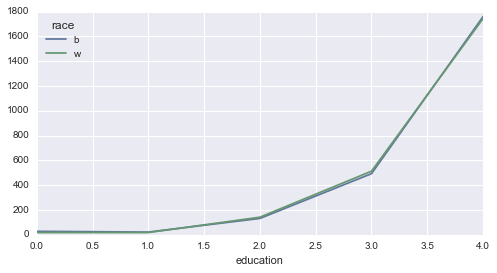

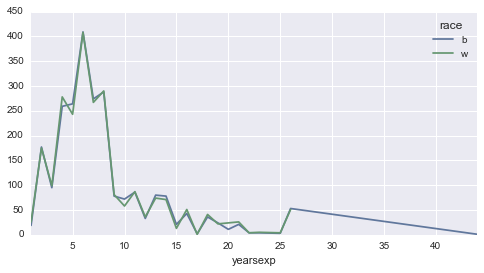

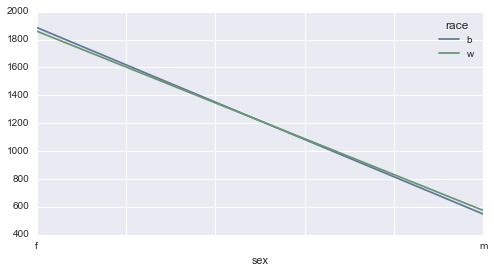

In [95]:
def groupings(df):
    df.groupby(['race', colname]).size().unstack('race').plot()
for colname, col in plotdata.iteritems():
    print(groupings(plotdata))

In [72]:
test = print(groupings(plotdata) for colname, col in plotdata)

<generator object <genexpr> at 0x10422dca8>
